In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [26]:
# Cargar el dataset
df = pd.read_csv("../data/students_stress_level_cleaned.csv")

In [27]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
2,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
3,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
4,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2


In [28]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 645 non-null    int64
 1   self_esteem                   645 non-null    int64
 2   mental_health_history         645 non-null    int64
 3   depression                    645 non-null    int64
 4   headache                      645 non-null    int64
 5   blood_pressure                645 non-null    int64
 6   sleep_quality                 645 non-null    int64
 7   breathing_problem             645 non-null    int64
 8   noise_level                   645 non-null    int64
 9   living_conditions             645 non-null    int64
 10  safety                        645 non-null    int64
 11  basic_needs                   645 non-null    int64
 12  academic_performance          645 non-null    int64
 13  study_lo

In [29]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


In [30]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,...,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,8.412403,22.623256,0.303876,8.627907,1.880620,1.604651,3.330233,2.355039,2.082171,2.910078,...,3.404651,3.367442,2.088372,3.347287,1.886822,2.640310,2.105426,2.105426,1.930233,0.589147
std,4.793613,6.064540,0.460287,5.325244,0.981037,0.615769,1.252736,1.148653,0.798528,0.804476,...,1.206469,1.205523,0.795916,1.186236,1.025103,0.608623,0.814114,0.832969,1.058726,0.602948
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,19.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,9.000000,25.000000,0.000000,9.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,12.000000,27.000000,1.000000,12.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000,2.000000


In [31]:
# Mostrar media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
anxiety_level                    8.412403
self_esteem                     22.623256
mental_health_history            0.303876
depression                       8.627907
headache                         1.880620
blood_pressure                   1.604651
sleep_quality                    3.330233
breathing_problem                2.355039
noise_level                      2.082171
living_conditions                2.910078
safety                           3.370543
basic_needs                      3.404651
academic_performance             3.367442
study_load                       2.088372
teacher_student_relationship     3.347287
future_career_concerns           1.886822
social_support                   2.640310
peer_pressure                    2.105426
extracurricular_activities       2.105426
bullying                         1.930233
stress_level                     0.589147
dtype: float64

Mediana de las características numéricas:
anxiety_level       

In [32]:
# Mostrar la varianza y desviación estándar de las características numéricas
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
anxiety_level                   22.978728
self_esteem                     36.778651
mental_health_history            0.211864
depression                      28.358226
headache                         0.962434
blood_pressure                   0.379171
sleep_quality                    1.569349
breathing_problem                1.319404
noise_level                      0.637647
living_conditions                0.647181
safety                           1.426150
basic_needs                      1.455568
academic_performance             1.453286
study_load                       0.633483
teacher_student_relationship     1.407155
future_career_concerns           1.050835
social_support                   0.370422
peer_pressure                    0.662781
extracurricular_activities       0.693837
bullying                         1.120901
stress_level                     0.363547
dtype: float64

Desviación estándar de las características numéricas:
anxie

In [33]:
# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numerical_columns)

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')
Columnas categóricas: Index([], dtype='object')


In [40]:
# Preparación de los datos

# Selección de variables más correlacionadas con 'stress_level'
selected_features = [
    'anxiety_level',
    'depression',
    'bullying',
    'self_esteem',
    'future_career_concerns',
    'peer_pressure',
    'social_support',
    'sleep_quality',
    'teacher_student_relationship'
]

# Separar X e y con las variables seleccionadas
X = df[selected_features]
y = df['stress_level']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar las variables numéricas
scaler = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrames si lo necesitas
X_train = pd.DataFrame(X_train_scaled, columns=selected_features, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=selected_features, index=X_test.index)

# Mostrar tamaños de los conjuntos
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (516, 9), (516,)
Datos de prueba: (129, 9), (129,)


In [41]:
# Modelos de clasificación
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluar los modelos con métricas de clasificación
classification_metrics = {}

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Guardar métricas
    classification_metrics[name] = {
        "Accuracy": acc,
        "F1 Score (weighted)": f1,
        "Classification Report": report
    }

# Mostrar las métricas de clasificación
for name, metrics in classification_metrics.items():
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score (weighted): {metrics['F1 Score (weighted)']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])


Logistic Regression Metrics:
Accuracy: 0.9767
F1 Score (weighted): 0.9758
Classification Report:
{'0': {'precision': 0.967741935483871, 'recall': 0.9836065573770492, 'f1-score': 0.975609756097561, 'support': 61.0}, '1': {'precision': 0.9836065573770492, 'recall': 1.0, 'f1-score': 0.9917355371900827, 'support': 60.0}, '2': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 8.0}, 'accuracy': 0.9767441860465116, 'macro avg': {'precision': 0.9837828309536402, 'recall': 0.9112021857923498, 'f1-score': 0.9414960501435002, 'support': 129.0}, 'weighted avg': {'precision': 0.977121329512706, 'recall': 0.9767441860465116, 'f1-score': 0.9757633349651088, 'support': 129.0}}

Random Forest Metrics:
Accuracy: 0.9845
F1 Score (weighted): 0.9835
Classification Report:
{'0': {'precision': 0.9682539682539683, 'recall': 1.0, 'f1-score': 0.9838709677419355, 'support': 61.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 60.0}, '2': {'precision': 1.0, 'recal

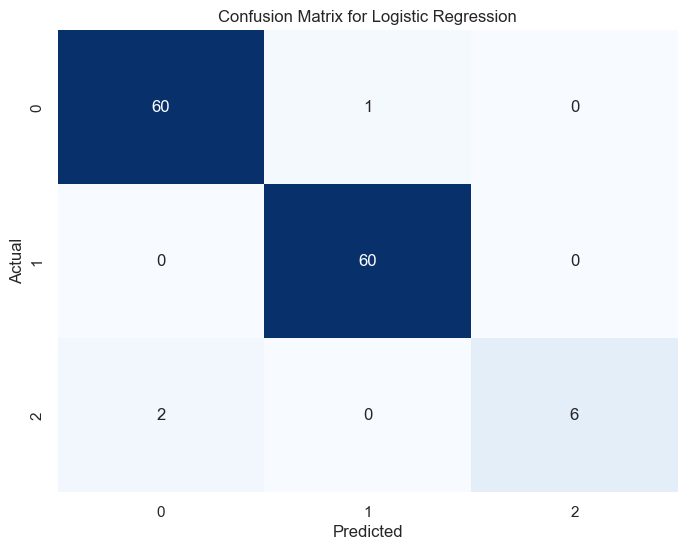

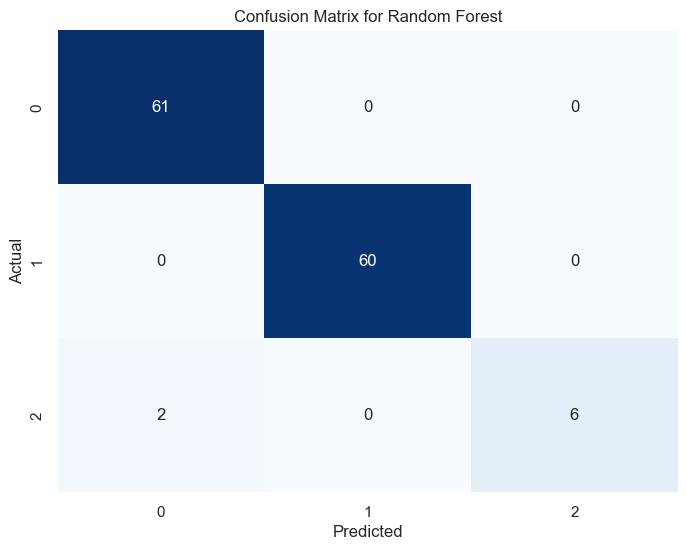

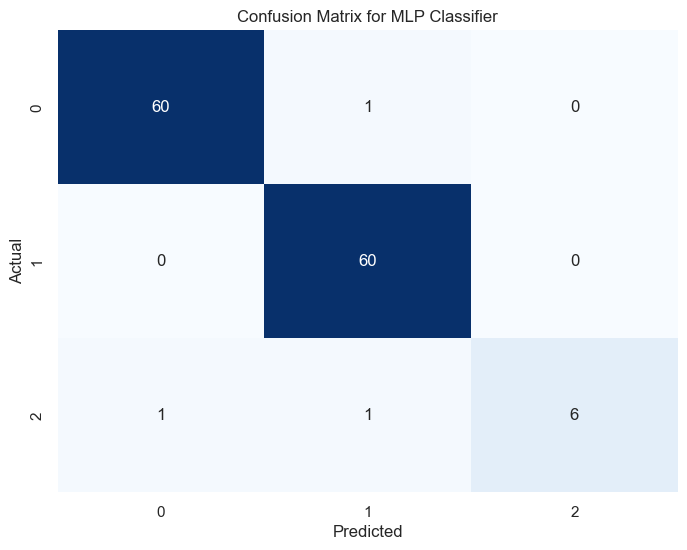

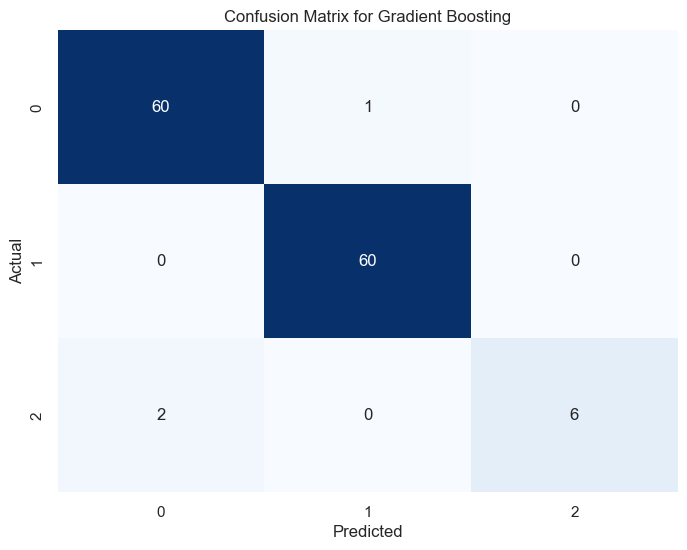

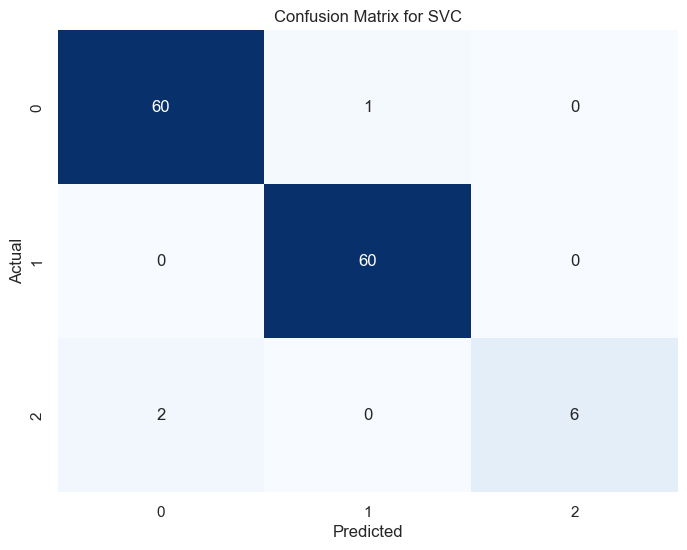

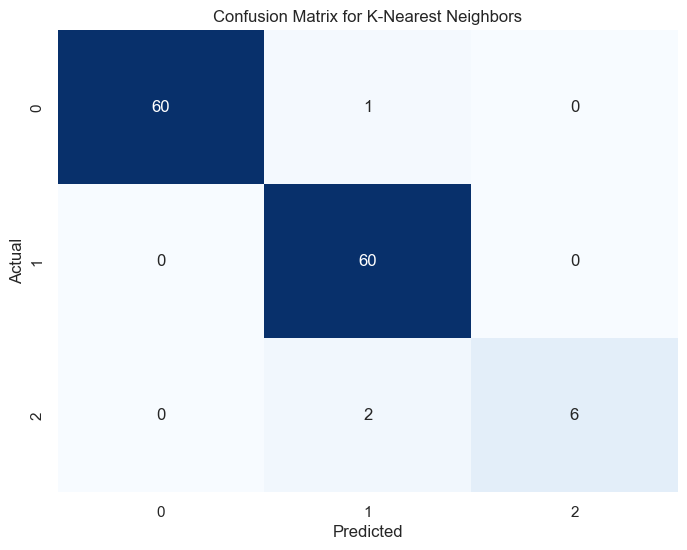

In [42]:
# Mostrar las matrices de confusión de los modelos
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

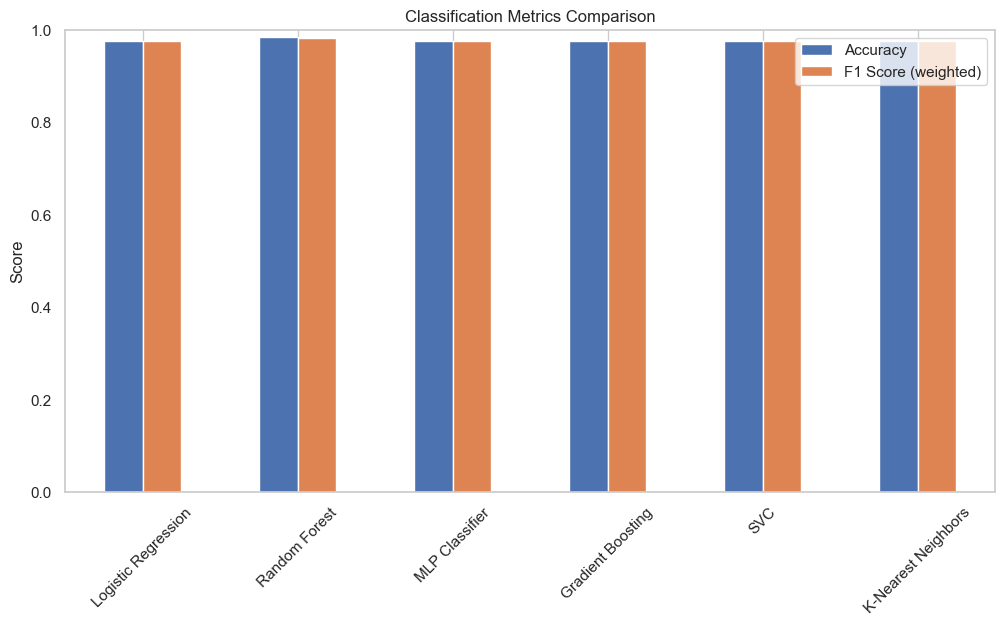

In [43]:
# Grafico de barras de las métricas de clasificación
def plot_classification_metrics(metrics):
    df_metrics = pd.DataFrame(metrics).T
    df_metrics = df_metrics[['Accuracy', 'F1 Score (weighted)']]
    
    df_metrics.plot(kind='bar', figsize=(12, 6))
    plt.title('Classification Metrics Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

plot_classification_metrics(classification_metrics)

In [44]:
#  Modelos de regresión
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Evaluar los modelos con métricas de regresión mse y r2 score
regression_metrics = {}

for name, model in regression_models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar métricas
    regression_metrics[name] = {
        "MSE": mse,
        "R2 Score": r2
    }

# Mostrar las métricas de regresión
for name, metrics in regression_metrics.items():
    print(f"\n{name} Metrics:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")


Linear Regression Metrics:
MSE: 0.0630
R2 Score: 0.8280

Random Forest Regressor Metrics:
MSE: 0.0537
R2 Score: 0.8534

MLP Regressor Metrics:
MSE: 0.0917
R2 Score: 0.7495

K-Nearest Neighbors Regressor Metrics:
MSE: 0.0307
R2 Score: 0.9161

Gradient Boosting Regressor Metrics:
MSE: 0.0595
R2 Score: 0.8375


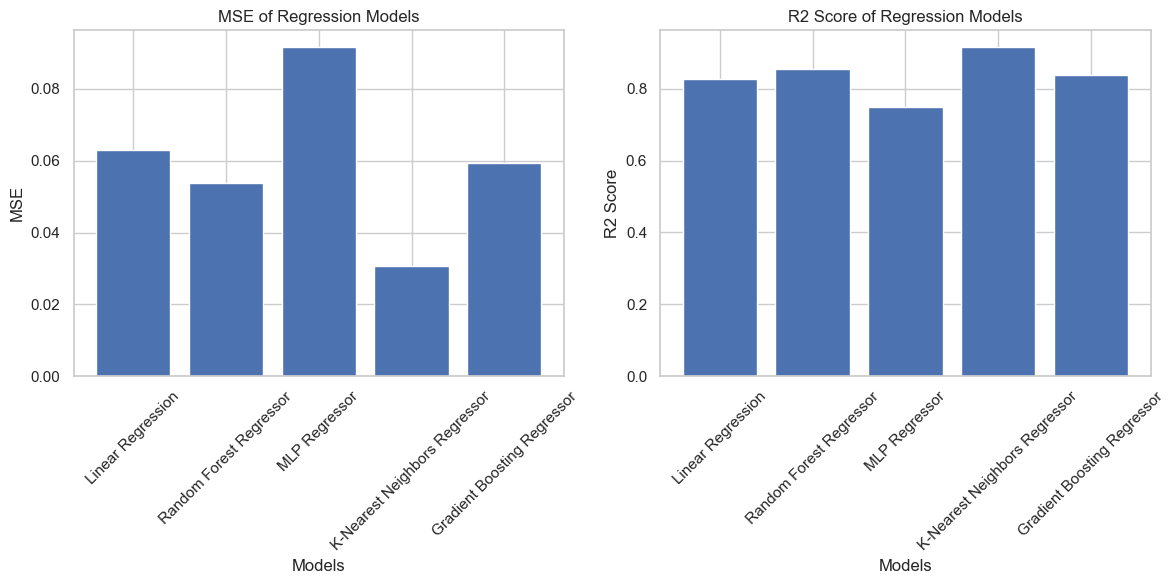

In [45]:
# Mostrar las gráficas de mse y r2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(regression_metrics.keys(), [metrics['MSE'] for metrics in regression_metrics.values()])
plt.title('MSE of Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(regression_metrics.keys(), [metrics['R2 Score'] for metrics in regression_metrics.values()])
plt.title('R2 Score of Regression Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()